In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import csv

import keras.utils as K
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D,BatchNormalization, UpSampling2D, Dropout, Dense, Reshape, ZeroPadding2D, Activation
from keras.layers import Conv2DTranspose, Flatten, Add, Concatenate, LeakyReLU
from keras.optimizers import Adam
from keras.regularizers import l2

%matplotlib inline

Using TensorFlow backend.


# Age Prediction Model

In [2]:
def agePredictionModel(h, w):
    
    inp_img = Input((h, w, 3))
    
    model = ZeroPadding2D((1,1),input_shape=(224,224, 3))(inp_img)
    model = Convolution2D(64, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(64, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(128, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(128, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(256, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(256, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(256, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = Convolution2D(4096, (7, 7), activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Convolution2D(4096, (1, 1), activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Convolution2D(2622, (1, 1))(model)
    model = Flatten()(model)
    model = Activation('softmax')(model)
    
    model = Model(inp_img, model)
#     return Model(inp_img, model)
    
    model.load_weights('vgg_face_weights.h5')
    
# def agePredictionModel(vggModel):
    for layer in model.layers[:-7]:
        layer.trainable = False

    base_model_output = Sequential()
    base_model_output = Convolution2D(101, (1, 1), name='predictions')(model.layers[-4].output)
    base_model_output = Flatten()(base_model_output)
    base_model_output = Activation('softmax')(base_model_output)

    return Model(inputs=model.input, outputs=base_model_output)


# Gender Prediction Model

In [3]:
def genderPredictionModel(h, w):
    
    inp_img = Input((h, w, 3))
    
    model = ZeroPadding2D((1,1),input_shape=(224,224, 3))(inp_img)
    model = Convolution2D(64, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(64, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(128, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(128, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(256, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(256, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(256, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = ZeroPadding2D((1,1))(model)
    model = Convolution2D(512, (3, 3), activation='relu')(model)
    model = MaxPooling2D((2,2), strides=(2,2))(model)

    model = Convolution2D(4096, (7, 7), activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Convolution2D(4096, (1, 1), activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Convolution2D(2622, (1, 1))(model)
    model = Flatten()(model)
    model = Activation('softmax')(model)
    
    model = Model(inp_img, model)
#     return Model(inp_img, model)
    
    model.load_weights('vgg_face_weights.h5')
    
    for layer in model.layers[:-7]:
        layer.trainable = False
 
    base_model_output = Sequential()
    base_model_output = Convolution2D(2, (1, 1), name='predictions')(model.layers[-4].output)
    base_model_output = Flatten()(base_model_output)
    base_model_output = Activation('softmax')(base_model_output)

    return Model(inputs=model.input, outputs=base_model_output)

## Load Model and Weights

In [4]:
ageModel = agePredictionModel(224, 224)
ageModel.load_weights("age_model_weights.h5")
ageModel.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxP

In [5]:
genderModel = genderPredictionModel(224, 224)
genderModel.load_weights("gender_model_weights.h5")
genderModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 114, 114, 64)      0         
__________

In [6]:
# #image path/live video path

# def find_faces(path, scale=0.3):
#     # Load the cascade
#     face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#     # Read the input image
#     img = cv2.imread(path)
#     plt.imshow(img)
#     # Convert into grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     H, W = img.shape[0], img.shape[1]

#     # Detect faces
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)
#     # Draw rectangle around the faces
#     cropped_img = []
#     for (x, y, w, h) in faces:
#         sx, sy = int(scale*w), int(scale*h)
#         if(y-sy>0 and y+h+sy<H and x-sx>0 and x+w+sx<W):
#             cropped_img.append(img[y-sy:y+h+sy,x-sx:x+w+sx])
#     return cropped_img

# cropped_img = find_faces('testFolder/PC.jpg', 0.1)
# # f, ax = plt.subplots(len(cropped_img),1, figsize=(10,10))
# # for i, c in enumerate(cropped_img):
# #     ax[i].imshow(c)

In [7]:
import csv
import datetime

In [8]:
df = pd.DataFrame(columns=['Age', 'Gender', 'TimeStamp'])

In [9]:
def predictAgeNGender(imageList, ageModel, genderModel, df, t):
    X = []
    for x in imageList:
        X.append(cv2.resize(x, (224, 224)))
        plt.imshow(cv2.resize(x, (224, 224)))
    
    ages = np.argmax(ageModel.predict(np.array(X).reshape(-1, 224, 224, 3)), axis=-1)
    genders = np.argmax(genderModel.predict(np.array(X).reshape(-1, 224, 224, 3)), axis=-1)
    for a, g in zip(ages, genders):
        if(g):
            g = "Male"
        else:
            g = "Female"
        df = df.append({'Age' : a , 'Gender' : g, 'TimeStamp': t}, ignore_index=True)
    df.to_csv("demographic.csv", mode='a', index=False, header=False)
    
#     if(len(X) > 1):
#         f, axs = plt.subplots(1,len(X),figsize=(15,15))
#         for ax, x in zip(axs, X):
#             ax.imshow(x)
#     else:
#         plt.imshow(X[0])

# Get Images from WebCam and Predict Age and Gender

Cropped 1
detected!!
Cropped 1
detected!!


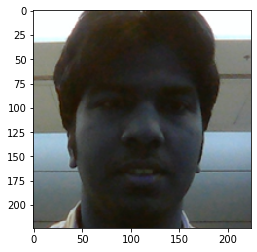

In [12]:
cap = cv2.VideoCapture(0)
d = False
counter = 0
c = 0
scale = 0.1
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while(True):    
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = frame.copy() #cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4, minSize=(150,150))
    # Display the resulting frame
    cropped_img = []
    for (x, y, w, h) in faces:
        # sx, sy = int(scale*w), int(scale*h)
        # cropped_img.append(img[y-sy:y+h+sy,x-sx:x+w+sx])
        gray = cv2.rectangle(gray, (x,y),(x+w,y+h), (255,0,0), 2)
    
    H, W = gray.shape[0], gray.shape[1]
    
    if counter%50 == 0:
        for (x, y, w, h) in faces:
            sx, sy = int(scale*w), int(scale*h)
            if(y-sy>0 and y+h+sy<H and x-sx>0 and x+w+sx<W):
                cropped_img.append(frame[y-sy:y+h+sy,x-sx:x+w+sx])

        if (len(cropped_img) > 0):
            print("Cropped {}".format(len(cropped_img)))
            print('detected!!')
            predictAgeNGender(cropped_img, ageModel, genderModel, df, datetime.datetime.now().strftime("%H:%M:%S"))
            c += 1
            if c==2:
                break
    
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    counter += 1

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [11]:
# np.argmax(genderModel.predict(img.reshape(1, height, width, 3)))

NameError: name 'img' is not defined